<a href="https://colab.research.google.com/github/YuehMintTai/000/blob/main/20211017Rpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rpy2

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages('pROC')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pROC_1.18.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 688430 bytes (672 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [4]:
%%R
myData<-read.csv('dep_result_df')
tail(myData,1)

        X real   predict 軍人 sex   age
4471 4470    1 0.3512212    0   2 29.25


R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



  |======================================================================| 100%


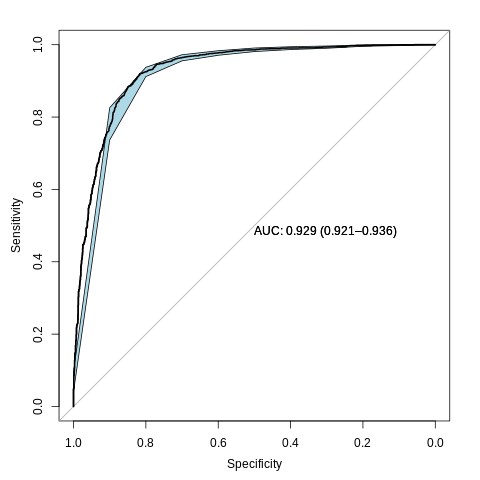

In [5]:
%%R
library(pROC)
pROC_obj<-roc(myData$real,myData$predict,smoothed=TRUE, print.auc=TRUE, ci=TRUE, ci.alpha=0.9, plot=TRUE)
myROC.ci<-ci.se(pROC_obj)
plot(myROC.ci, type='shape',col='lightblue')

In [ ]:
%%R
install.packages('InformationValue')

In [7]:
%%R
library(InformationValue)
optimal<-optimalCutoff(myData$real,myData$predict)[1]
confusionMatrix(myData$real,myData$predict)
confusionMatrix(myData$real,myData$predict,threshold=optimal)
optimal ##0.1687012
sensitivity(myData$real,myData$predict) #0.7041864
specificity(myData$real,myData$predict) #0.9247035
sensitivity(myData$real,myData$predict,threshold=optimal) ##0.9206161
specificity(myData$real,myData$predict,threshold=optimal) ##0.8127901

[1] 0.8127901


In [17]:
%%R
###select military cases
tail(myData,1)
myData_m<-myData[myData$`軍人`=='1',]
tail(myData_m,1)
myData_c<-myData[myData$軍人=='0',]
tail(myData_c,1)

        X real   predict 軍人 sex   age
4471 4470    1 0.3512212    0   2 29.25


In [34]:
%%R
rocm<-roc(myData_m$real,myData_m$predict)
rocc<-roc(myData_c$real,myData_c$predict)
rocT<-roc(myData$real,myData$predict)
roc.test(roc1,roc2)
roc.test(rocT,roc1)
roc.test(rocT,roc2)

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases




	DeLong's test for two ROC curves

data:  rocT and roc2
D = 2.0353, df = 3716.1, p-value = 0.04189
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.9286641   0.9120201 



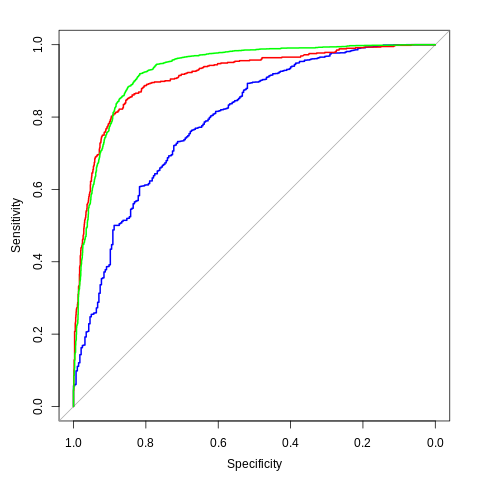

In [36]:
%%R
library(pROC)
plot.roc(rocm,percent=TRUE,col='blue')
lines.roc(rocc,percent=TRUE,col='red')
lines.roc(rocT,col='green')